<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/1%20-%20An%C3%A1lise%20inicial%20dos%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

### Importando bibliotecas a serem usadas

In [5]:
install.packages('gdata')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(gdata)))
suppressMessages(suppressWarnings(library(caret)))


In [0]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

## Reunindo e explorando alguns datasets disponíveis
Lista:


1. [Whisky](http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html)
7. [Telco](https://www.kaggle.com/blastchar/telco-customer-churn)
3. [Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone)
4. [Sponge](https://archive.ics.uci.edu/ml/datasets/Sponge)
6. [Housing](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
5. [Vinho](https://archive.ics.uci.edu/ml/datasets/wine)
8. [MovieLens](https://grouplens.org/datasets/movielens/1m/)




### Download dos dados

In [0]:
# Com atributos categóricos
whisky <- "https://www.dropbox.com/s/bf4sf8jdckcgwrz/scotch.csv?dl=1"
telco <- "https://www.dropbox.com/s/kh59jmg9rvo5hpc/telco_treino.csv?dl=1"
abalone <- "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
sponge <- "https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data"
housing <- "https://www.dropbox.com/s/zdbdnnhui9tkj2q/housing_treino.csv?dl=1"


# Totalmente numéricos
wine <- "https://www.dropbox.com/s/iya32vzp81jb8bv/wine_data.csv?dl=1"
movielens <- "https://www.dropbox.com/s/ucwh8f86hk2hm6k/ml-1m.csv?dl=1"


# Escolha um dataset e faça o download
data <- read.csv(whisky, sep=';')

## Objetivo

Dado que eu sei um *whisky* que eu gosto e tenho dados sobre a **composição do whisky**, como **recomendar** um outro vinho?

### Qual a ideia por trás?

Para recomendar um novo whisky, precisa-se saber quais são **parecidos** ou **similares** à aqueles que eu tomei e gostei.

Existem diversas métricas de similaridade, as mais comuns baseadas em **geometria**. Uma maneira de conseguir calculá-las é representar os dados através de **vetores** e localizá-los em um espaço vetorial. Dessa maneira, é possível utilizar funções de distância entre vetores (como euclidiana, coseno, entre outras) como medidas de similaridade.

Para facilitar a visualização das diferentes observações e facilitar os cálculos, podemos reunir um conjunto de **vetores** e realizar as contas todas de uma vez. O conjunto de vetores é chamado **matriz**, onde cada linha representa um dado diferente e cada coluna uma característica ou **atributo** do dado.

### Colocando nossos dados no espaço vetorial






In [10]:
data

NAME,X,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,⋯,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Aberfeldy,Aberfeldy,0,1,0,0,0,0,0,0,⋯,MIDLAND,0,1,0,0,0,0,0,0,0
Aberlour,Aberlour,0,0,0,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
Ardberg,Ardberg,0,0,0,0,0,0,0,0,⋯,SOUTH,1,0,0,0,0,0,0,0,0
Ardmore,Ardmore,0,0,0,0,1,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
Auchentoshan,Auchentosh,0,0,0,0,1,0,0,0,⋯,WEST,0,0,0,0,0,0,1,0,0
Aultmore,Aultmore,0,0,1,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
Balblair,Balblair,1,0,0,0,0,0,0,0,⋯,NORTH,0,0,0,0,0,1,0,0,0
Balmenach,Balmenach,0,0,0,0,1,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
Balvenie,Balvenie,0,0,0,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0


O *dataframe* criado já está bem parecido com uma matriz, exceto por alguns dados extras. Como limpamos isso?

#### Lidando com dados categóricos

Como inserir uma informação categórica em um espaço vetorial? Antes de escolher a melhor maneira, é preciso se perguntar algumas características sobre essa variável.

##### Ela é **nominal** ou **ordinal**?

**Nominais** são aquelas onde não existe nenhum tipo de ordem ou ranking entre as categorias, como gênero, por exemplo. Já as **ordinais**, possuem alguma ordem embutida, como por exemplo, escolaridade.

##### Tipos de codificadores
 - Ordinal: converte cada valor para um inteiro.
 - OneHot (ou Dummy) - cria-se uma nova coluna/atributo para cada valor.
 - Hashing — Como o OneHot, mas utilizando hash. Pode-se perder alguma informação por causa de colisões.
 
 
 Então vamos verificar quais das nossas colunas possui variáveis categóricas e transformá-las para números. Em R, as variáveis do tipo *factor* são as variáveis categóricas.

In [11]:
data %>% Filter(f = is.factor) %>% names

[1] "NAME"     "X"        "X."       "REGION"   "DISTRICT"

Separate whisky names

In [12]:
data_names <- data %>% select(NAME)
data_names

NAME
<fct>
Aberfeldy
Aberlour
Ardberg
Ardmore
Auchentoshan
Aultmore
Balblair
Balmenach
Balvenie


In [13]:
data_cleaned <- data %>% select(-NAME, -X, -X.)
data_cleaned %>% Filter(f = is.factor) %>% names

[1] "REGION"   "DISTRICT"

Analisando somente os dados categóricos

In [0]:
data_categ <- data_cleaned %>% select(REGION, DISTRICT)

In [15]:
distinct(data_categ %>% select(REGION))

REGION
<fct>
HIGH
ISLAY
LOW
LOW


In [16]:
distinct(data_categ %>% select(DISTRICT))

DISTRICT
<fct>
MIDLAND
SPEY
SOUTH
WEST
NORTH
BORDERS
LOCH
EAST
CAMPBEL


Opa! Tem um nome repetido na variável REGION. Provavelmente algum espaço no final da palavra. Vamos limpar também.

In [0]:
data_cleaned <- trim(data_cleaned)

In [18]:
distinct(data_cleaned %>% select(REGION))

REGION
<fct>
HIGH
ISLAY
LOW


Como as colunas REGION e DISTRICT são nominais, vamos utilizar o codificador **One Hot** (ou **Dummy Variables**)

In [19]:
dmy <- dummyVars(" ~ .", data = data_cleaned)
data_onehot <- data.frame(predict(dmy, newdata = data_cleaned))
data_onehot

wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,⋯,DISTRICT.WEST,islay,midland,spey,east,west,north,lowland,campbell,islands
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


In [0]:
save(data_names, file = "data_names.Rdata")
save(data_onehot, file = "data_onehot.Rdata")
save(data_cleaned, file = "data_cleaned.Rdata")

### Visualizando os dados

Agora que já limpamos nossos dataframes e condificamos eles, qual a melhor maneira de realmente entender sua informações?

Descrições estatísticas

   
     0  1
  0 78 27
  1  4  0

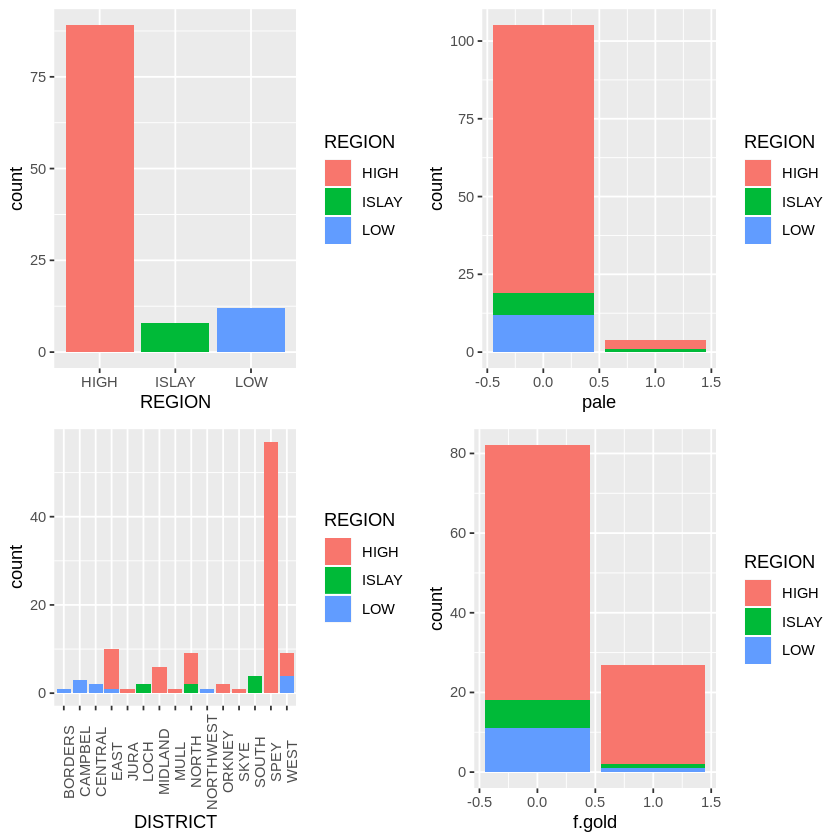

In [21]:
region <- ggplot(data_cleaned, aes(x=REGION, fill=REGION)) +
       geom_bar()

district <- ggplot(data_cleaned, aes(x=DISTRICT, fill=REGION)) +
       geom_bar() + theme(axis.text.x = element_text(angle = 90))

pale <- ggplot(data_cleaned, aes(x=pale, fill=REGION)) +
       geom_bar()

gold <- ggplot(data_cleaned, aes(x=f.gold, fill=REGION)) +
       geom_bar()

multiplot(region, district, pale, gold,
          cols = 2)

table(data_cleaned$pale, data_cleaned$f.gold)

As descrições estatísticas são ótimas para ter um **visão geral** do que acontece no dataset, mas não te dá informações sobre uma observação específica. Como essa observação se compara com as outras? Quem é parecido com essa?